In [ ]:
import pandas as pd
import matplotlib as plt
import sklearn
import seaborn  as sns
import numpy as np


In [2]:
# Load dataset
dataset = pd.read_csv('mlb_payrolls.csv')

# Check for any empty values in dataset
print(dataset[dataset.isna().any(axis=1)]) 
# Remove outlier 2020 year (This was a shortened season, from 162 games to just 60)
dataset = dataset[dataset['Year'] != 2020]

# Clean cash amounts to integers - check '-' strings where '-' is found, rather than dropping those rows for now (~26%)
dataset['Total Payroll Allocations'] = dataset['Total Payroll Allocations'].str.replace(',', '').str.replace('$', '').convert_dtypes()
dataset['Active 26-Man'] = dataset['Active 26-Man'].str.replace(',', '').str.replace('$', '').astype(int)
dataset['Injured'] = dataset['Injured'].str.replace(',', '').str.replace('$', '').convert_dtypes()
dataset['Retained'] = dataset['Retained'].str.replace(',', '').str.replace('$', '').convert_dtypes()
dataset['Buried'] = dataset['Buried'].str.replace(',', '').str.replace('$', '').convert_dtypes()

# Clean other 
print(dataset.dtypes)


Empty DataFrame
Columns: [Team, Team Name, Year, Average Age, Total Payroll Allocations, Active 26-Man, Injured, Retained, Buried, Wins, Losses, Postseason]
Index: []
Team                                 object
Team Name                            object
Year                                  int64
Average Age                         float64
Total Payroll Allocations    string[python]
Active 26-Man                         int64
Injured                      string[python]
Retained                     string[python]
Buried                       string[python]
Wins                                  int64
Losses                                int64
Postseason                           object
dtype: object


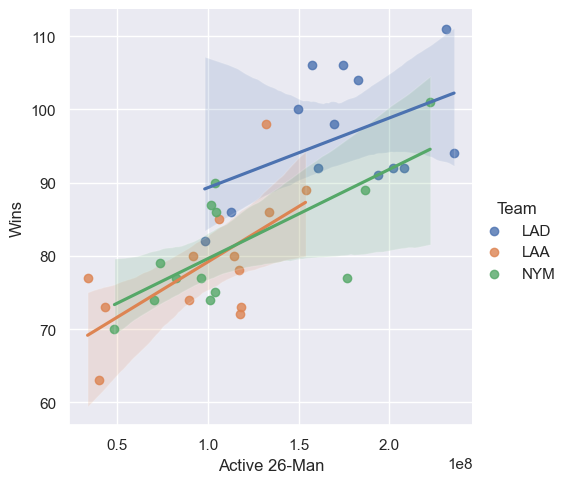

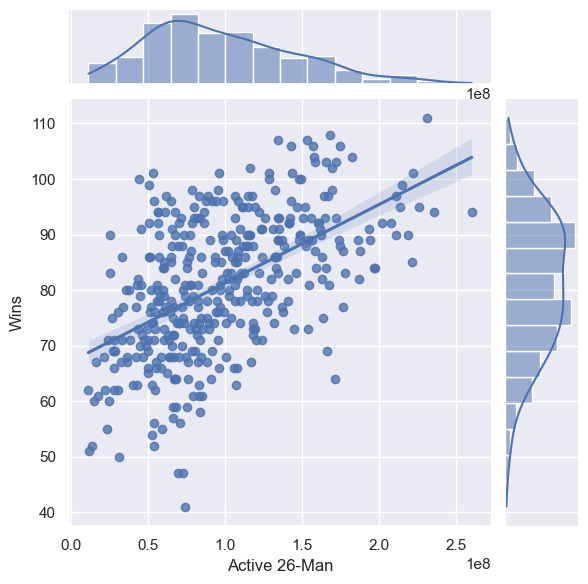

In [16]:
sns.set_theme()
#sns.lmplot(dataset[dataset['Team'] == 'LAD'], x='Wins', y='Active 26-Man')
sns.lmplot(dataset[(dataset['Team'] == 'LAD') | (dataset['Team'] == 'LAA') | (dataset['Team'] == 'NYM')], y='Wins', x='Active 26-Man', hue='Team')#, x_estimator=np.mean)
#sns.residplot(dataset, x='Wins', y='Active 26-Man')
#sns.relplot(dataset[(dataset['Team'] == 'LAD') | (dataset['Team'] == 'NYY')], x='Wins', y='Active 26-Man', hue='Postseason', size='Team', height=5)
#sns.relplot(dataset, x='Active 26-Man', y='Wins', hue='Team')

sns.jointplot(dataset, y='Wins', x='Active 26-Man', kind='reg')